# Task 2- To Explore Supervised Machine Learning
### By Jayant Jain
Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.
It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process.

![img](https://techvidvan.com/tutorials/wp-content/uploads/sites/2/2020/07/Supervised-Learning-in-ML-tv.jpg))

### Importing and Reading Data

In [1]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')
%matplotlib inline

In [2]:
#To avoid unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading Data
data=pd.read_csv("student_scores - student_scores.csv")

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print("Dimensions of this Data:",data.shape)
print("Columns: 2")
print("Rows: 25")

Dimensions of this Data: (25, 2)
Columns: 2
Rows: 25


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Findings:
    1. Mean Score = 51.48
    2. Average Study Hours = 5
    3. Min Study Hours and Score = 1 and 17
    4. Max Study Hours and Score = 9.2 and 95

### Scatter Plot to view Data distribution

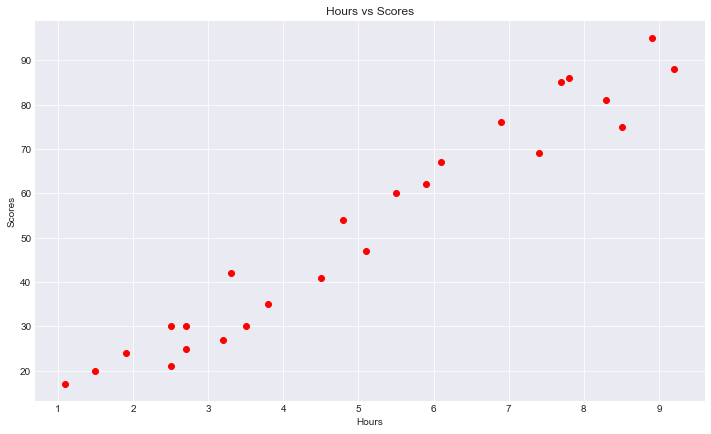

From the graph it is clear that the best fit line for this will be Linear


In [7]:
fig=plt.figure(figsize=(12,7))
plt.scatter(data['Hours'],data['Scores'],color='r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()
print("From the graph it is clear that the best fit line for this will be Linear")

### Density Distribution of Scores

<AxesSubplot:xlabel='Scores', ylabel='Density'>

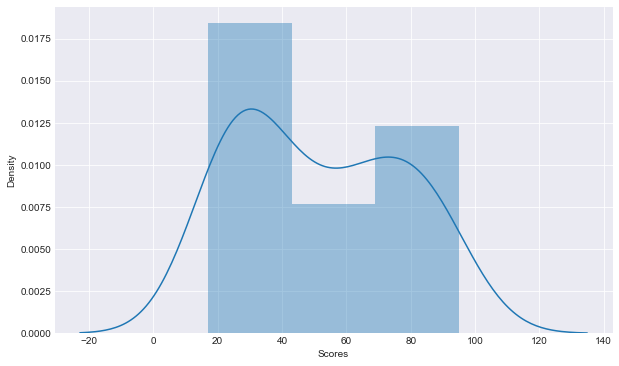

In [8]:
fig=plt.figure(figsize=(10,6))
sns.distplot(data["Scores"])

### Density Distribution for Hours

<AxesSubplot:xlabel='Hours', ylabel='Density'>

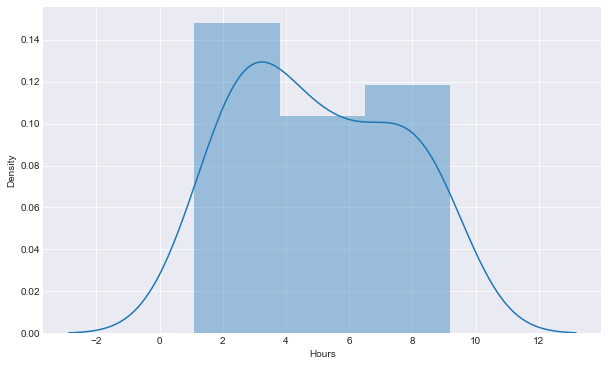

In [9]:
fig=plt.figure(figsize=(10,6))
sns.distplot(data["Hours"])

### Splitting the Data

In [10]:
X = data.drop(labels='Scores', axis=1).values.reshape(-1,1)
Y = data.loc[:,'Scores'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### Model 1- Linear Regression Model

linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

The case of one explanatory variable is called simple linear regression.

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print('Intercept',reg.intercept_)
print('Coefficient',reg.coef_)
y_pred=reg.predict(X_test)
np.set_printoptions(precision=2)

Intercept [2.01816004]
Coefficient [[9.91065648]]


In [12]:
y_pred=reg.predict(X_test)              #y will be predicted based on x

df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})          # renaming columns 

df.head(10)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


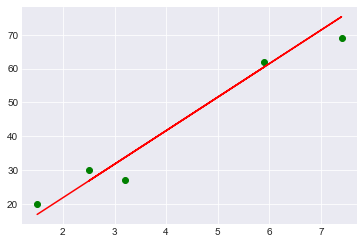

In [13]:
plt.scatter(X_test,y_test,color='g')
plt.plot(X_test,y_pred,color='red')
plt.show()

In [14]:
# You can also test with your own data

hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = reg.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = [93.69]


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Root Mean Squared Error: 4.6474476121003665


## Model 2 (SVR)
Support Vector Machines (SVMs) are well known in classification problems.
The use of SVMs in regression is not as well documented, however.
These types of models are known as Support Vector Regression (SVR).

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [17]:
y_pred=regressor.predict(X_test)              #y will be predicted based on x

df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})          # renaming columns 

df.head(10)

,Actual,Predicted
0,20,20.32500
1,27,35.51875
2,69,73.05625
3,30,29.26250
4,62,59.65000


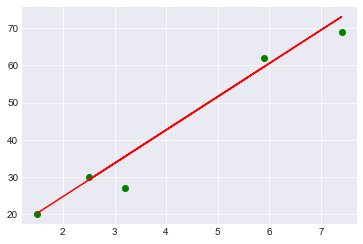

In [18]:
plt.scatter(X_test,y_test,color='g')
plt.plot(X_test,y_pred,color='red')
plt.show()

In [19]:
# To Test Custom Data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 89.59062556937582


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.197500040038552
Root Mean Squared Error: 4.363354250312286


## Conclusion:
#### With Mean Abolute Error of 3.19, SVR seems to be a better Choice for this Dataset